In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210505_07_54_14_000_T4CaxysrQ7W21Wgl1wZWBCtdRjE3_F_3264_2448.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210518_06_25_57_000_6SLj9T2MBmhTqitpNcjcjOVAYyG2_F_3000_4000.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210512_09_41_56_000_ovRKxW0QbBVfwN9RW4teROP1YgG3_F_4160_3120.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210512_13_32_08_000_vVGqfiibxjRMSkSyttjdIlsHrj92_F_3000_4000.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210517_13_00_53_000_QTHwLcCLJSgc8mdgtvUWq1eiMT52_F_3264_2448.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210522_00_57_36_000_z2umdg3LdTXQFkhWMsDipg7Sys22_T_4160_3120.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210521_09_35_46_000_3i9IwxEEa6UEWq4gEOQ2NQnD0uz2_F_3000_4000.jpg
/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210516_14_40_11_000_bsfUf1M1E9bMsvY4ENiWwUWjDQp2_F_4160_3120.jpg
/kaggle/input/indian-vehicle-dataset/Tem

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf 

In [3]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *

In [4]:
image_dir = Path('/kaggle/input/indian-vehicle-dataset')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'*/*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [5]:
lst = []
for l in image_df['Label'].unique():
    lst.append(image_df[image_df['Label'] == l])
# Concatenate the DataFrames
image_df = pd.concat(lst)

In [6]:
image_dir1 = Path("/kaggle/input/bike-images")
# Get filepaths and labels
filepaths = list(image_dir1.glob(r'*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print(labels)
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df1 = pd.concat([filepaths, labels], axis=1)


['bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-images', 'bike-ima

In [7]:
image_df1['Label'] = 'bike'

In [8]:
image_df1.head()

,Filepath,Label
0,/kaggle/input/bike-images/1570811001027.jpg,bike
1,/kaggle/input/bike-images/1570811000956.jpg,bike
2,/kaggle/input/bike-images/1570811001146.jpg,bike
3,/kaggle/input/bike-images/1570811000995.jpeg,bike
4,/kaggle/input/bike-images/1570811001006.jpeg,bike


In [9]:
image_df.describe()

,Filepath,Label
count,744,744
unique,744,5
top,/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210505_07_54_14_000_T4CaxysrQ7W21Wgl1wZWBCtdRjE3_F_3264_2448.jpg,Truck
freq,1,194


In [10]:
im_df = image_df.append(image_df1, ignore_index=True)
im_df.describe()

,Filepath,Label
count,849,849
unique,849,6
top,/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210505_07_54_14_000_T4CaxysrQ7W21Wgl1wZWBCtdRjE3_F_3264_2448.jpg,Truck
freq,1,194


In [11]:
# Shuffle the DataFrame and reset index
im_df = im_df.sample(frac=1).reset_index(drop = True)

# Show the result
im_df.head(3)

,Filepath,Label
0,/kaggle/input/indian-vehicle-dataset/Tractor/20210602_16_57_07_000_cRZBBnhaTifVuUVCwVT7NBQaZYq2_F_4000_3000.jpg,Tractor
1,/kaggle/input/indian-vehicle-dataset/Truck/Datacluster Truck (100).jpg,Truck
2,/kaggle/input/indian-vehicle-dataset/Tractor/20210601_07_32_50_000_zEVxECLwyrfGZjJhVahcq5zqryg2_F_4608_3456.jpg,Tractor


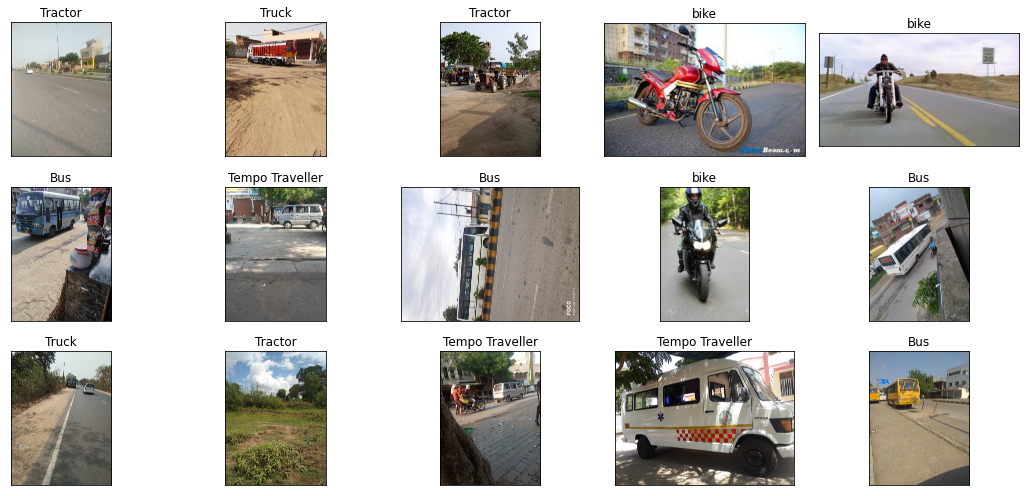

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(im_df.Filepath[i])
    ax.imshow(img)
    ax.set_title(im_df.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_df, test_df = train_test_split(im_df, train_size=0.9, shuffle=True, random_state=1)

In [14]:
test_df.describe()

,Filepath,Label
count,85,85
unique,85,6
top,/kaggle/input/indian-vehicle-dataset/Tempo Traveller/20210515_14_28_43_000_Db2I2d17GLf53JzlQRSP28hD4Ml1_F_2592_1944.jpg,Truck
freq,1,23


In [15]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

In [16]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 611 validated image filenames belonging to 6 classes.
Found 152 validated image filenames belonging to 6 classes.
Found 85 validated image filenames belonging to 6 classes.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [17]:
pretrained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2022-05-11 03:47:08.191631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 03:47:08.192799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 03:47:08.193475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 03:47:08.194249: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

2022-05-11 03:47:22.391352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-11 03:47:33.289797: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 143s 7s/step - loss: 1.5757 - accuracy: 0.3633 - val_loss: 1.2758 - val_accuracy: 0.4276
Epoch 2/50
20/20 [==============================] - 107s 5s/step - loss: 1.0496 - accuracy: 0.6088 - val_loss: 1.0943 - val_accuracy: 0.5658
Epoch 3/50
20/20 [==============================] - 107s 5s/step - loss: 0.8411 - accuracy: 0.6858 - val_loss: 1.3274 - val_accuracy: 0.5526


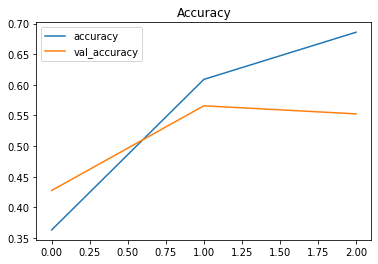

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

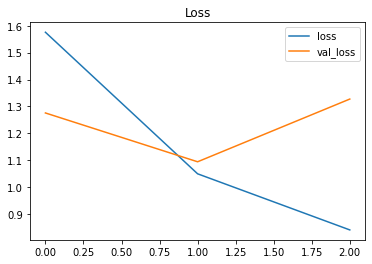

In [21]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss:",(results[0]))
print("Test Accuracy:",(results[1] * 100),"%")

    Test Loss: 1.0435137748718262
Test Accuracy: 60.00000238418579 %
